In [27]:
#Audio loading , duration and sample rate
import librosa
audio_file ='/content/Clap.wav'
samples , sample_rate = librosa.load(audio_file , sr = None)
print(f"Sample rate :{sample_rate}")
duration  = librosa.get_duration(y = samples , sr = sample_rate)
print(f"Duration of the audio file :{duration} seconds")
from IPython.display import Audio
Audio(samples ,rate = sample_rate)


Sample rate :44100
Duration of the audio file :5.0 seconds


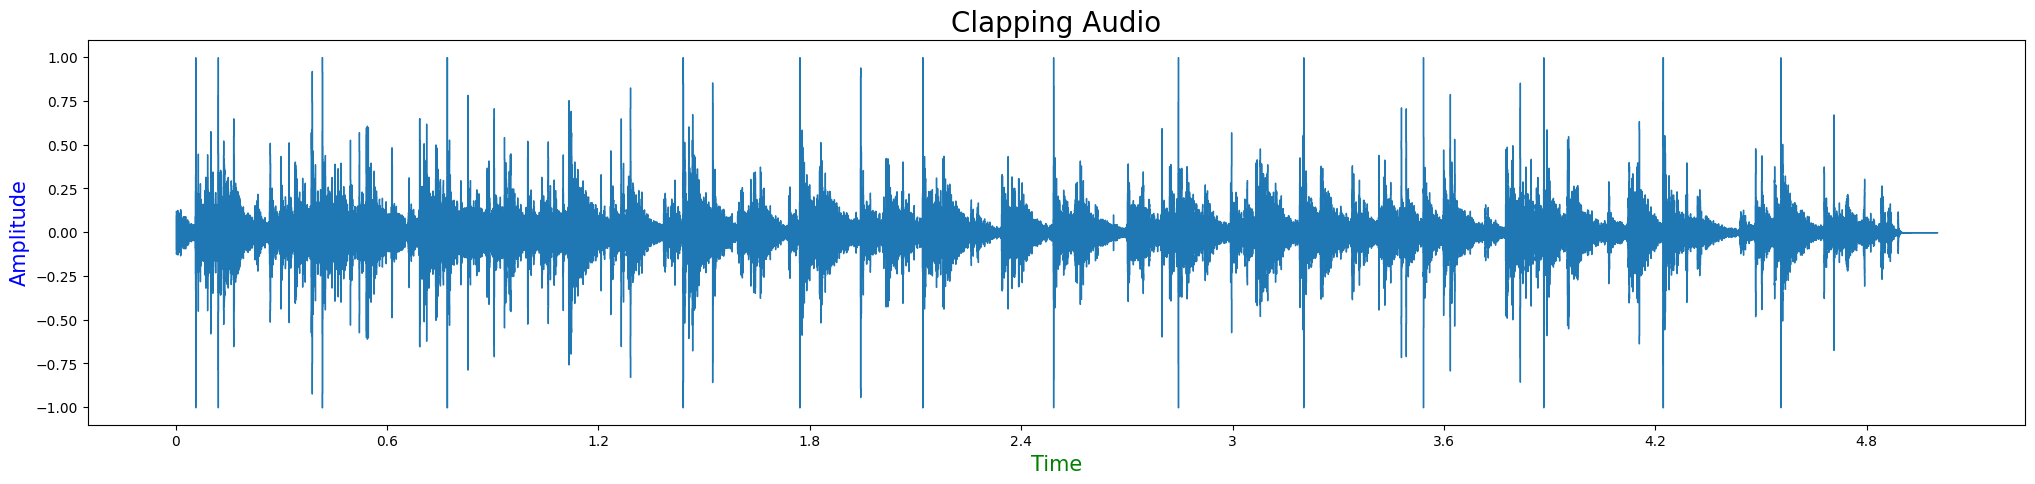

In [28]:
#plot raw audio data waveform
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize = (25,5))
librosa.display.waveshow(samples , sr = sample_rate)
plt.title('Clapping Audio' , color = 'Black' , fontsize=20)
plt.xlabel('Time' , color = 'green' , fontsize=15)
plt.ylabel('Amplitude' , color = 'blue' , fontsize=15)
plt.show()



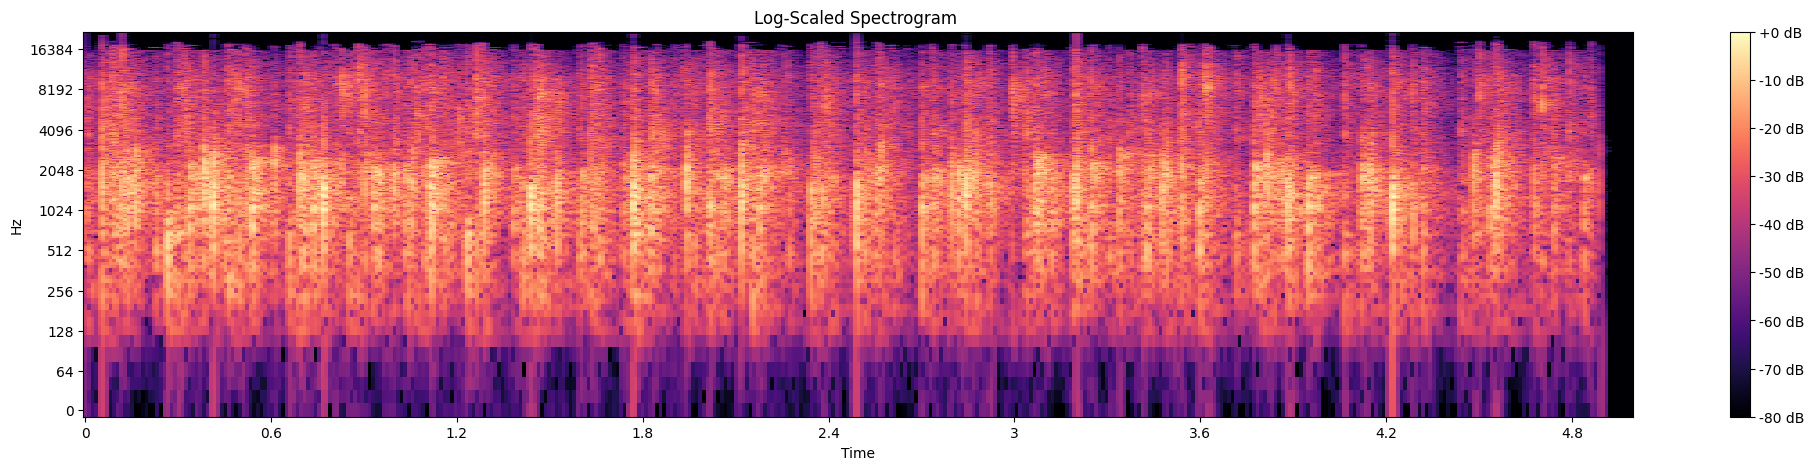

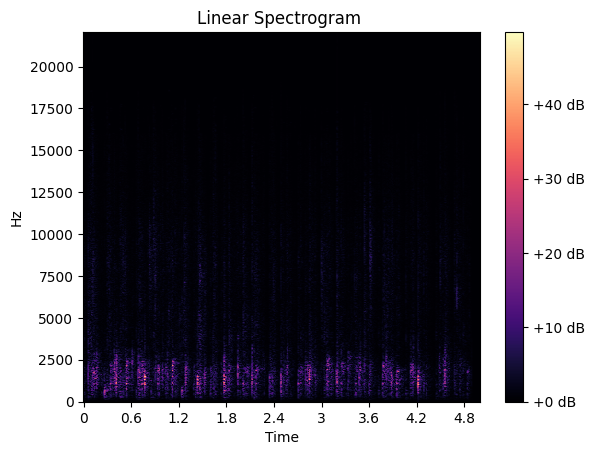

In [29]:
#Log scaled and linear Spectrogram
import numpy as np
D = librosa.stft(samples)
S_db = librosa.amplitude_to_db(np.abs(D),ref = np.max)
plt.figure(figsize = (25,5))
librosa.display.specshow(S_db , sr = sample_rate , x_axis='time' , y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-Scaled Spectrogram ")
plt.show()
librosa.display.specshow(np.abs(D) , sr = sample_rate , x_axis = 'time' ,y_axis = 'linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Linear Spectrogram ")
plt.show()

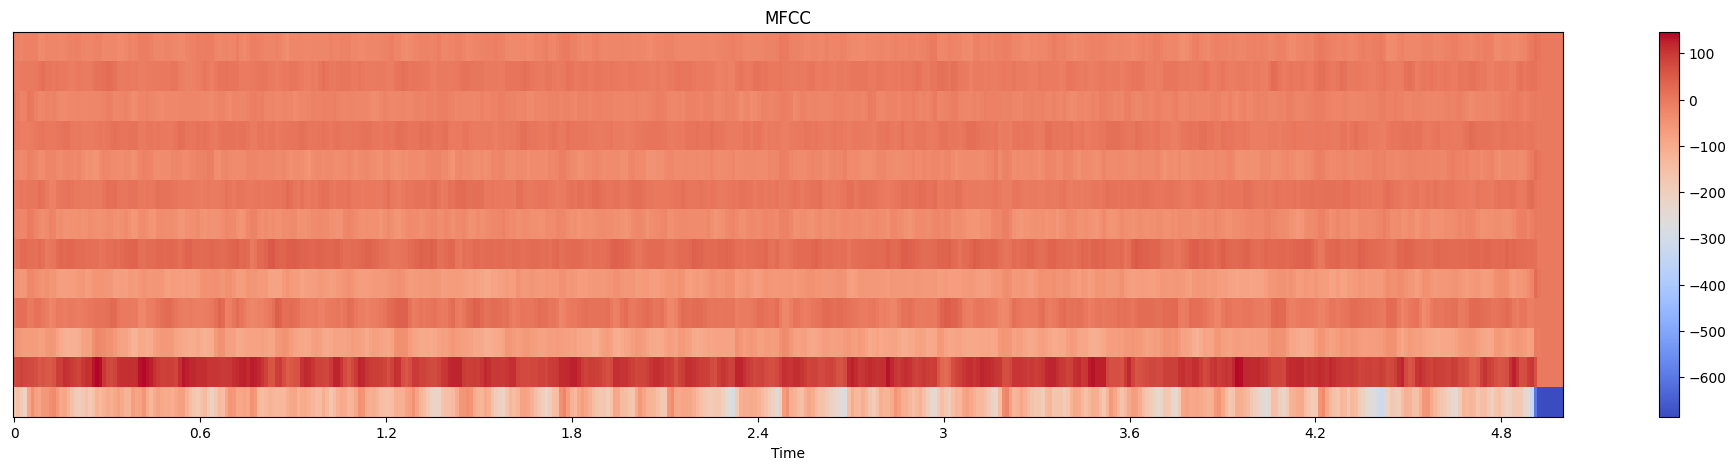

In [30]:
#MFCC
mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(25, 5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title("MFCC")

plt.show()

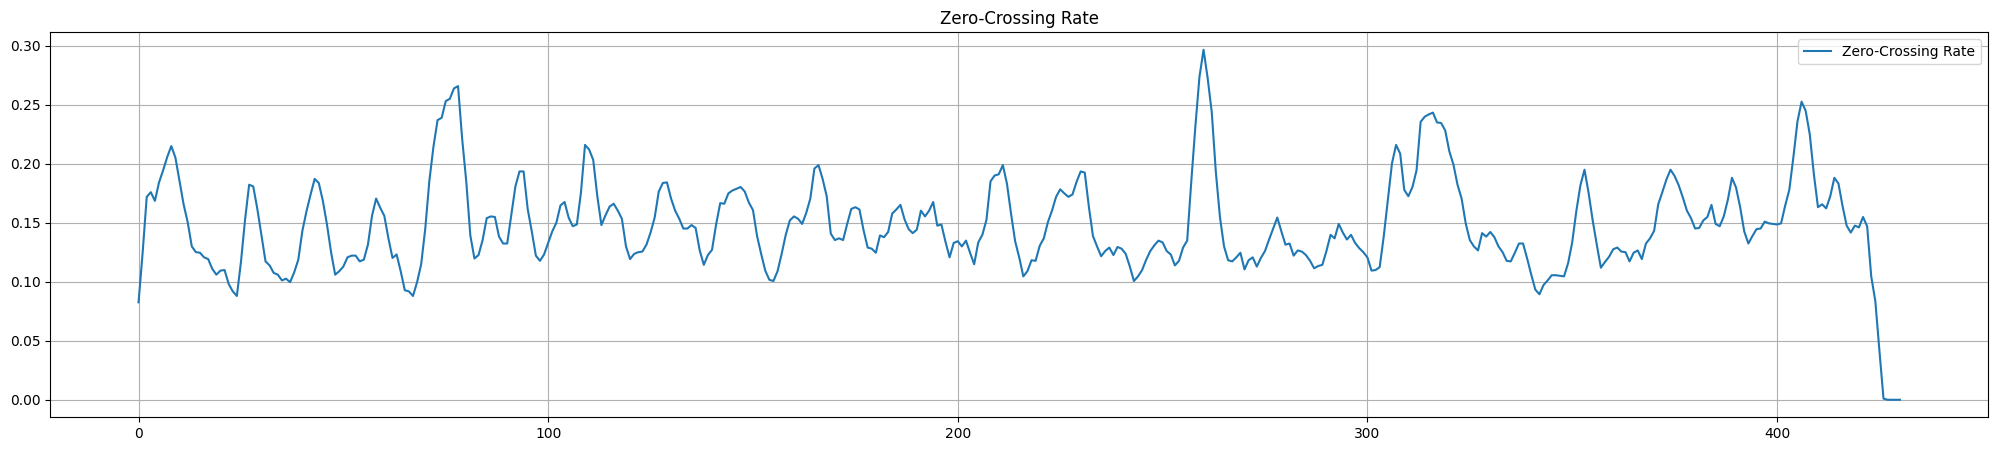

In [31]:
#Feature extraction
# Zero Crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(samples)
plt.figure(figsize=(25, 5))
plt.plot(zero_crossings[0], label="Zero-Crossing Rate")
plt.legend(loc='upper right')
plt.title("Zero-Crossing Rate")
plt.legend()
plt.grid(True)
plt.show()


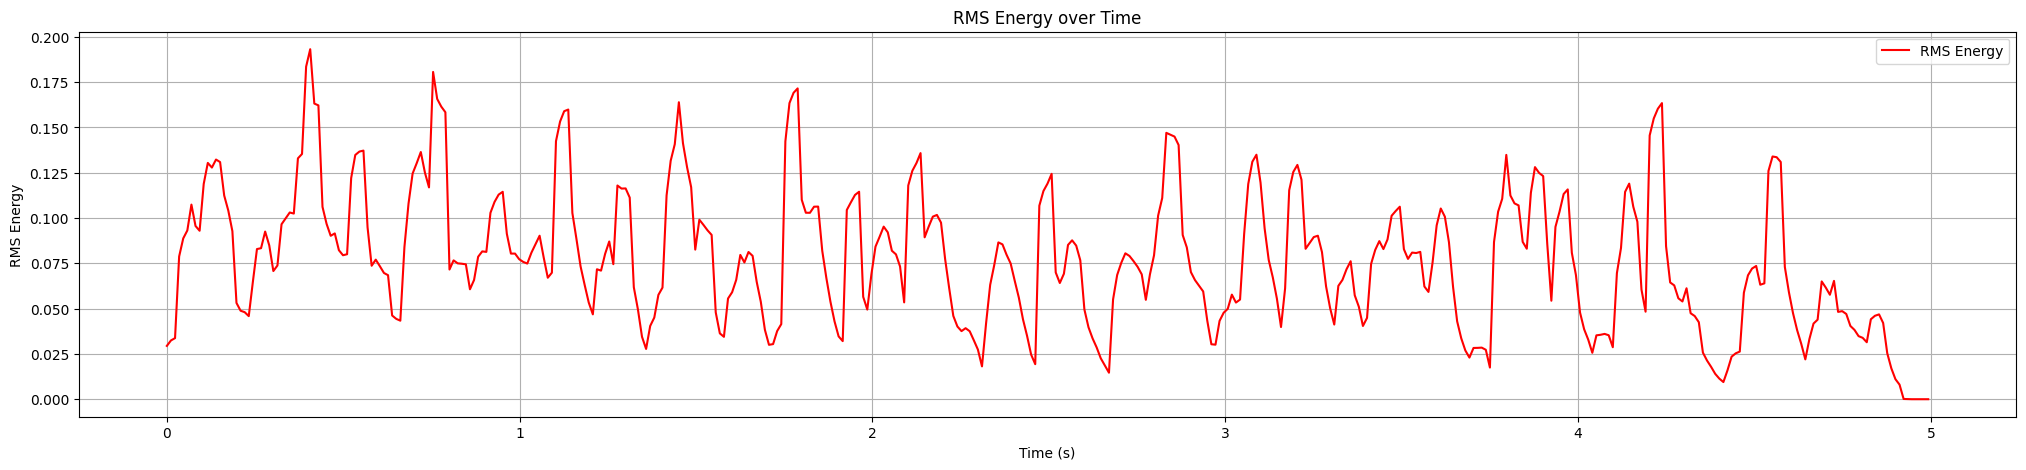

In [32]:
#RMS Energy
rms = librosa.feature.rms(y=samples)[0]
rms_db = librosa.amplitude_to_db(rms, ref=np.max)
times = librosa.times_like(rms, sr=sample_rate)
plt.figure(figsize=(25, 5))
plt.plot(times, rms, label='RMS Energy', color='red')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.title('RMS Energy over Time')
plt.legend()
plt.grid(True)
plt.show()

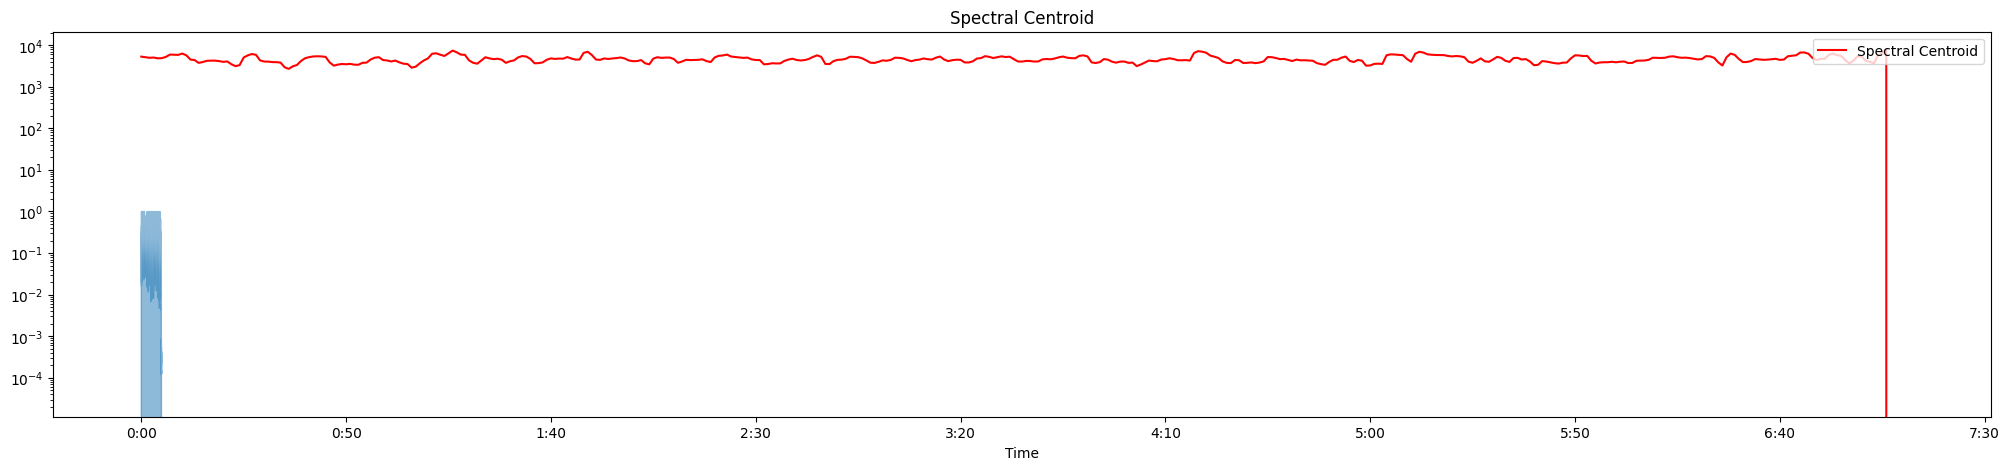

In [33]:
#Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y = samples , sr = sample_rate)[0]
plt.figure(figsize=(25,5))
plt.semilogy(spectral_centroid, color='r', label='Spectral Centroid')
librosa.display.waveshow(samples, sr=sample_rate, alpha=0.5)
plt.legend(loc='upper right')
plt.title("Spectral Centroid")
plt.show()

In [34]:
# Time Streching
import soundfile as sf
y1 = librosa.effects.time_stretch(samples, rate=1.5)
y2 = librosa.effects.pitch_shift(y1,sr=sample_rate , n_steps=2)
sf.write('manipulated_audio.wav' , y2 , sample_rate)
Audio(y2 ,rate = sample_rate)
